## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>

In [4]:
import pandas as pd

true = pd.read_csv('../data/true_news.csv', header = 0)
true['target'] = 1
fake = pd.read_csv('../data/fake_news.csv', header = 0)
fake['target'] = 0

In [5]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
data = pd.concat([true, fake], axis=0)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


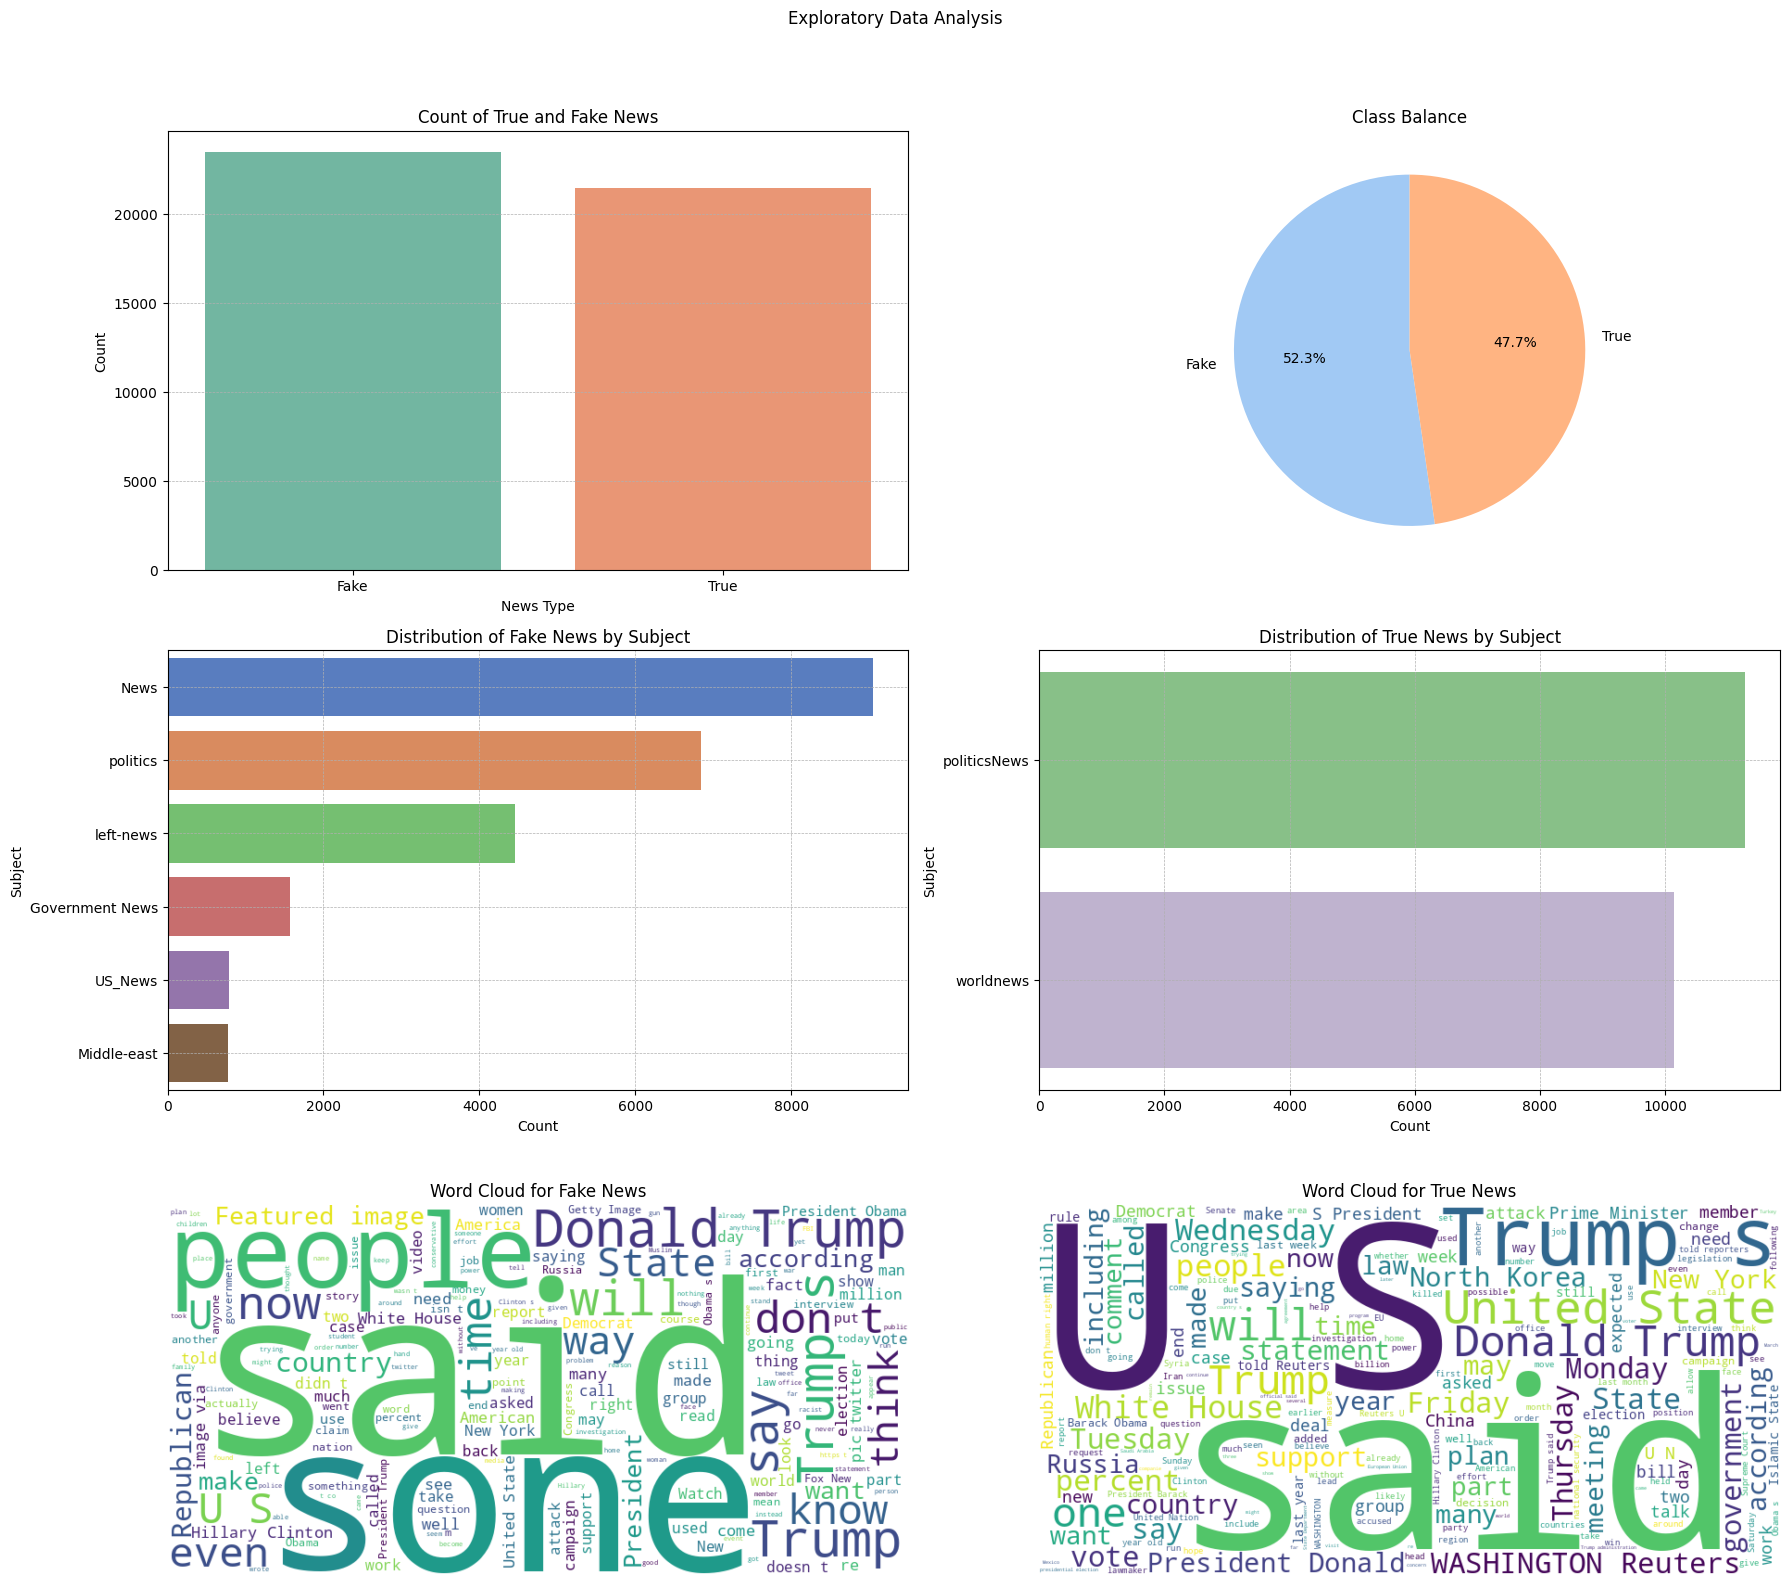

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

fig, axes = plt.subplots(3, 2, figsize=(18, 17))
fig.suptitle('Exploratory Data Analysis')

# Number of True and Fake News
sns.countplot(data=data, x='target', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Count of True and Fake News')
axes[0, 0].set_xticklabels(['Fake', 'True'])
axes[0, 0].set_xlabel('News Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', linestyle='--', linewidth=0.5)

# Class Balance
class_balance = data['target'].value_counts(normalize=True)
axes[0, 1].pie(class_balance, labels=['Fake', 'True'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0, 1].set_title('Class Balance')

# Distribution of Fake News by Subject
if 'subject' in fake.columns:
    sns.countplot(data=fake, y='subject', order=fake['subject'].value_counts().index, palette='muted', ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Fake News by Subject')
    axes[1, 0].set_xlabel('Count')
    axes[1, 0].set_ylabel('Subject')
    axes[1, 0].grid(linestyle='--', linewidth=0.5)

# Distribution of True News by Subject
if 'subject' in true.columns:
    sns.countplot(data=true, y='subject', order=true['subject'].value_counts().index, palette='Accent', ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of True News by Subject')
    axes[1, 1].set_xlabel('Count')
    axes[1, 1].set_ylabel('Subject')
    axes[1, 1].grid(linestyle='--', linewidth=0.5)

#  Word Cloud for Fake News
fake_text = ' '.join(fake['text'].astype(str).tolist())
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
axes[2, 0].imshow(fake_wordcloud, interpolation='bilinear')
axes[2, 0].axis('off')
axes[2, 0].set_title('Word Cloud for Fake News')

# Word Cloud for True News
true_text = ' '.join(true['text'].astype(str).tolist())
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)
axes[2, 1].imshow(true_wordcloud, interpolation='bilinear')
axes[2, 1].axis('off')
axes[2, 1].set_title('Word Cloud for True News')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Data Preprocessing </span>

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.1. Key Features to Use </span>

- Delete unneeded columns.

In [6]:
data.drop(columns=["title","date","subject"],inplace=True)
data.head()

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Check for null values.

In [7]:
data.isna().sum()

text      0
target    0
dtype: int64

- Check for duplicates.

In [8]:
data.duplicated().sum()

6251

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38647 entries, 0 to 22702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38647 non-null  object
 1   target  38647 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 905.8+ KB


### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.2. Text Cleaning </span>

- Remove extra whitespaces: Remove leading, trailing, and extra spaces.
- Remove Special Characters: Eliminate non-alphanumeric characters (e.g., !@#$%) as they add noise.
- Convert to Lowercase: Standardize text for better token matching.
- Remove Stopwords: Remove common words (e.g., "the", "is") that don’t add significant meaning.
- Lemmatization: Reduce words to their base form (e.g., "running" → "run").

In [11]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove special characters
    text = re.sub(r'\W', ' ', str(text))  

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove not alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Lemmatization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Removal of Stop Words
    tokens = [word for word in tokens if len(word) > 3]
    
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
data['tokens'] = data['text'].apply(clean_text)

# Convert the tokens to strings for TF-IDF
data['text_cleaned'] = data['tokens'].apply(lambda x: ' '.join(x))

# List of lists of tokens for LSTM
texts_lstm = data['tokens'].tolist()

In [13]:
print(texts_lstm[:10])

[['washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'among', 'republican', 'representative', 'mark', 'meadow', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmaker', 'bracing', 'battle', 'january', 'return', 'holiday', 'wednesday', 'lawmaker', 'begin', 'trying', 'federal', 'budget', 'fight', 'likely', 'linked', 'issue', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republican', 'want', 'budget', 'increase', 'military', 'spending', 'democrat', 'also', 'want', 'proportional', 'increase', 'defense', 'discretionary', 'spending', 'program', 'support', 'education', 'scientific', 'research', 'infrastructure', 'public', 'healt

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.3. TF-IDF Vectorization </span>

- Use TF-IDF to convert the cleaned content into numerical vectors for ML models.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# TF-IDF Vectorization for ML models
vectorizer = TfidfVectorizer(max_features = 5000) # Limit the number of features to 5000 so training does not take too long
X_tfidf = vectorizer.fit_transform(data['text_cleaned'])

# Tokenization and Padding for LSTM
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts_lstm)
word_idx = tokenizer.word_index
X_tokenized = tokenizer.texts_to_sequences(texts_lstm)
max_sequence_length = 150  # Define max sequence length for padding
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length)

In [15]:
size = len(word_idx)
size

101211

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.3. Train-Test Split </span>

- Split the dataset into train and test sets, ensuring the split is stratified to maintain the balance of classes.

In [16]:
from sklearn.model_selection import train_test_split

# Split data for ML and LSTM
y = data['target']  # Target variable

# Split for ML models
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42
)

# Split for LSTM models
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_padded, y, test_size=0.2, stratify=y, random_state=42
)

# Display shapes
print("TF-IDF Shape (ML):", X_tfidf.shape)
print("Padded Sequences Shape (DL):", X_padded.shape)
print("ML Train Shape:", X_train_ml.shape, y_train_ml.shape)
print("DL Train Shape:", X_train_dl.shape, y_train_dl.shape)

TF-IDF Shape (ML): (38647, 5000)
Padded Sequences Shape (DL): (38647, 150)
ML Train Shape: (30917, 5000) (30917,)
DL Train Shape: (30917, 150) (30917,)


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Decision Tree Classifier - CART </span>

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model with decision tree
cart_model = DecisionTreeClassifier(
            max_depth = 10,
            criterion = 'gini',
            class_weight = 'balanced',
            random_state = 42
          )

# Fit the model
cart_model.fit(X_train_ml, y_train_ml)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

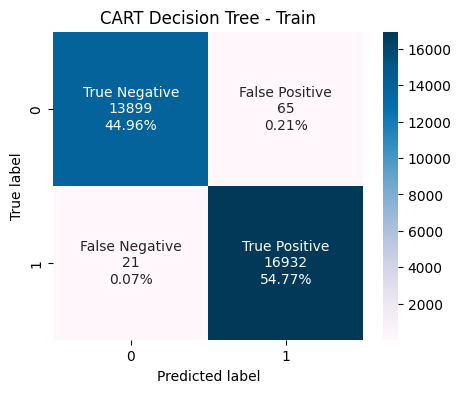

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, cart_model.predict(X_train_ml), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

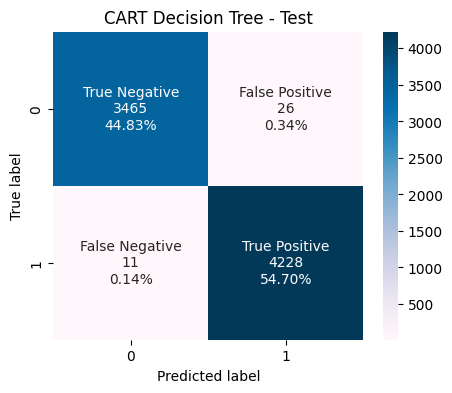

In [19]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, cart_model.predict(X_test_ml), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 3.1. Pruning Analysis</span>

In [20]:
from sklearn.model_selection import GridSearchCV

#  Alternative method using GridSearchCV to fine tune method parameters
param_grid = {
    'max_depth':[5, 8, 10, 15],
    'min_samples_split':[10, 30, 50, 60, 70],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = 1)
gridSearch.fit(X_train_ml, y_train_ml)

print('Initial Score: ', gridSearch.best_score_)
print('Initial Parameters: ', gridSearch.best_params_)

Initial Score:  0.9959893158914397
Initial Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 10}


In [21]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_split': [8, 10, 12, 15],
    'min_impurity_decrease': [0.00005, 0.00008, 0.0001, 0.0003, 0.0005],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = -1)
gridSearch.fit(X_train_ml, y_train_ml)

print('Improved Score: ', gridSearch.best_score_)
print('Improved Parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved Score:  0.9960863509341271
Improved Parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 8}


In [22]:
# Fit the pruned tree with improved parameters
pruned_tree = DecisionTreeClassifier(random_state = 42, max_depth = 7, min_impurity_decrease = 0.0001, min_samples_split = 8, class_weight = 'balanced')
pruned_tree.fit(X_train_ml, y_train_ml)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_impurity_decrease=0.0001, min_samples_split=8,
                       random_state=42)

In [23]:
import pickle

# Save the model with pickle
with open('dt_pruned_model.pkl', 'wb') as file:
    pickle.dump(pruned_tree, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


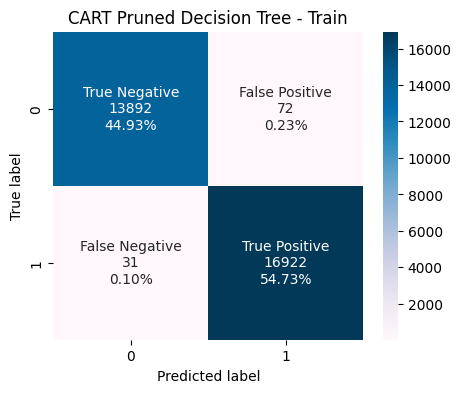

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, pruned_tree.predict(X_train_ml), labels = pruned_tree.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

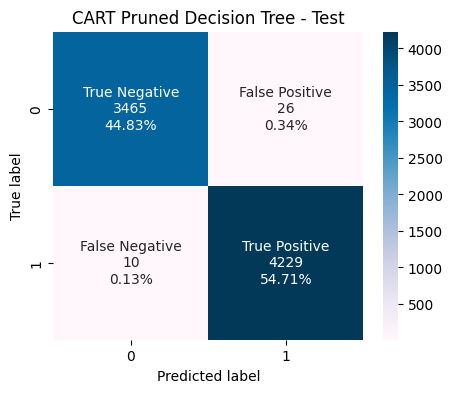

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, pruned_tree.predict(X_test_ml), labels = pruned_tree.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 3.2. Classification Report </span>

In [26]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test_ml,
        y_pred = pruned_tree.predict(X_test_ml)
    )
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3491
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Random Forest </span>

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [20, 25, 50, 100, 150],
                'max_features': [5, 10, 15, 20, 25],
                'max_depth'   : [1, 5, 10, 15, 20],
                'criterion'   : ['gini', 'entropy']
                }
            )

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42,
                ** params
             )
    
    model.fit(X_train_ml, y_train_ml)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
124,0.972928,gini,20,25,150
249,0.972410,entropy,20,25,150
99,0.972345,gini,15,25,150
224,0.969370,entropy,15,25,150
114,0.968723,gini,20,15,150
239,0.967752,entropy,20,15,150
119,0.967688,gini,20,20,150
248,0.966976,entropy,20,25,100
123,0.965488,gini,20,25,100
238,0.965424,entropy,20,15,100


In [28]:
# Better hyperparameters using out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (OOB - Accuracy)")
print("---------------------------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (OOB - Accuracy)
---------------------------------------------------------------------
0.9729275156063008 : 0.9729275156063008 accuracy


In [29]:
# Model creation
rf_best_oob = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'gini',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_best_oob.fit(X_train_ml, y_train_ml)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [30]:
# Save the model with pickle
with open('rf_oob_model.pkl', 'wb') as file:
    pickle.dump(rf_best_oob, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


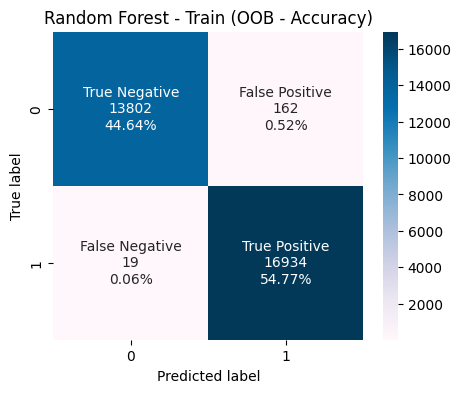

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, rf_best_oob.predict(X_train_ml), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

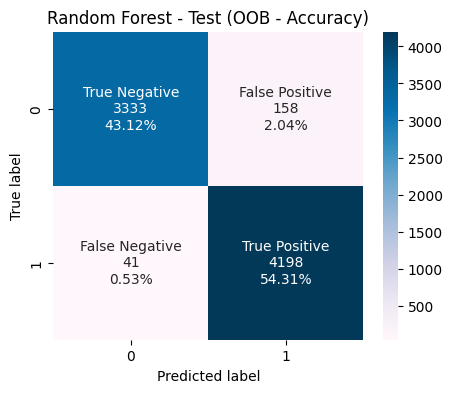

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, rf_best_oob.predict(X_test_ml), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [33]:
from sklearn.model_selection import RepeatedKFold

# Grid search based on cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100, 150],
              'max_features': [5, 10, 15, 20, 25],
              'max_depth'   : [1, 5, 10, 15, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search by CV
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 42, class_weight = 'balanced'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_ml, y = y_train_ml)

# Resultados
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
124,gini,20,25,150,0.976636,0.001881,0.995089,0.000277
249,entropy,20,25,150,0.976388,0.001594,0.995089,0.000329
99,gini,15,25,150,0.974588,0.001652,0.990289,0.000527
224,entropy,15,25,150,0.973585,0.002127,0.989941,0.000630


In [34]:
# Better hyperparameters using cv and out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (Cross - Validation)
---------------------------------------------------------------------
{'criterion': 'gini', 'max_depth': 20, 'max_features': 25, 'n_estimators': 150} : 0.9766363933658601 accuracy


In [35]:
# Model creation
rf_cv = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'gini',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_cv.fit(X_train_ml, y_train_ml)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [36]:
# Save the model with pickle
with open('rf_cv_model.pkl', 'wb') as file:
    pickle.dump(rf_cv, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


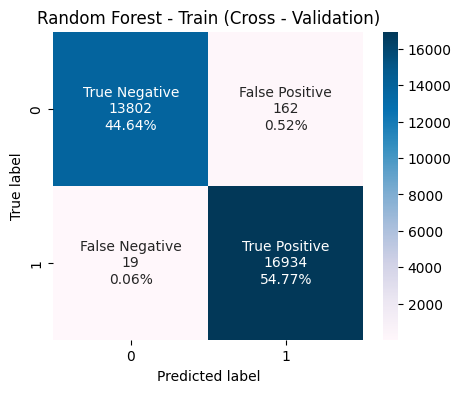

In [37]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, rf_cv.predict(X_train_ml), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

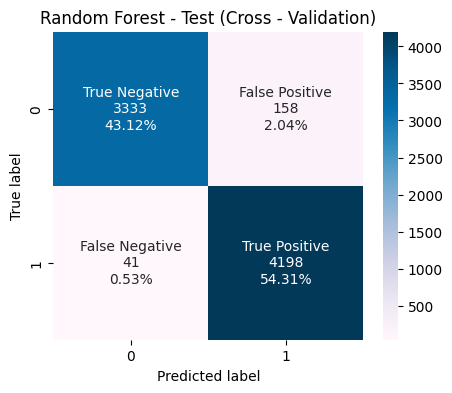

In [38]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, rf_cv.predict(X_test_ml), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 21px;"> 4.1. Classification Report </span>

In [39]:
print(
    classification_report(
        y_true = y_test_ml,
        y_pred = rf_cv.predict(X_test_ml)
    )
)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3491
           1       0.96      0.99      0.98      4239

    accuracy                           0.97      7730
   macro avg       0.98      0.97      0.97      7730
weighted avg       0.97      0.97      0.97      7730



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. XGBoost </span>

In [40]:
import xgboost as xgb

positive_instances = sum(y_train_ml == 1)
negative_instances = sum(y_train_ml == 0)
ratio = negative_instances / positive_instances

clf = xgb.XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = negative_instances/positive_instances
)
parameters = {
    "eta": [0.15, 0.2, 0.25],             
    "max_depth": [6, 7, 8],            
    "min_child_weight": [1, 2],        
    "gamma": [0.1, 0.2],             
    "colsample_bytree": [0.3, 0.5], 
    "n_estimators": [30, 50]          
}

grid = GridSearchCV(clf, parameters, n_jobs = 4, cv = 3)
grid.fit(X = X_train_ml, y = y_train_ml)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'eta': [0.15, 0.2, 0.25], 'gamma': [0.1, 0.2],
                         'max_depth': [6, 7, 8], 'min_child_weight': [1, 2],
                         'n_estimators': [30, 50]})

In [41]:
# Results
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_colsample_bytree,param_eta,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,mean_test_score,std_test_score
29,0.3,0.2,0.1,7,1,50,0.996604,0.000441
41,0.3,0.2,0.2,7,1,50,0.996571,0.000399
37,0.3,0.2,0.2,6,1,50,0.996539,0.000556
35,0.3,0.2,0.1,8,2,50,0.996539,0.000278
45,0.3,0.2,0.2,8,1,50,0.996539,0.000229
61,0.3,0.25,0.2,6,1,50,0.996507,0.000519
65,0.3,0.25,0.2,7,1,50,0.996507,0.000363
53,0.3,0.25,0.1,7,1,50,0.996507,0.000363
67,0.3,0.25,0.2,7,2,50,0.996507,0.000412
27,0.3,0.2,0.1,6,2,50,0.996507,0.000274


In [42]:
# Best hiperparameters using CV
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - XGBoosting (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - XGBoosting (Cross - Validation)
---------------------------------------------------------------------
{'colsample_bytree': 0.3, 'eta': 0.2, 'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50} : 0.9966038258875686 None


In [43]:
n_trees_included = len(grid.best_estimator_.get_booster().get_dump())
print(f"Number of Trees Included in the Model: {n_trees_included}")

Number of Trees Included in the Model: 50


In [44]:
xgb_model = grid.best_estimator_

In [45]:
# Save the model with pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


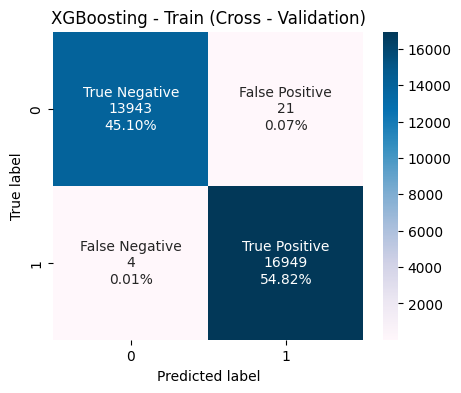

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, xgb_model.predict(X_train_ml), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

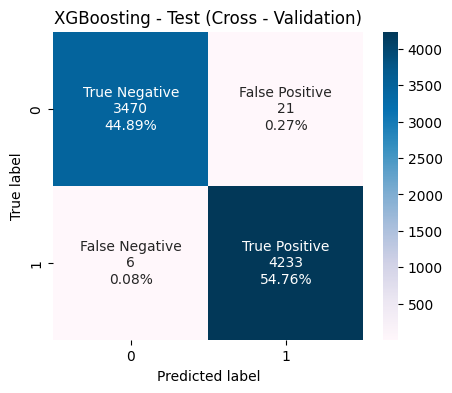

In [47]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, xgb_model.predict(X_test_ml), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 6. LSTM </span>

In [48]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout

# Model Parameters
maxlen = 150
embed_size = 100

input = Input(shape=(maxlen,))
learning_rate = 0.0001
x = Embedding(size + 1, embed_size)(input)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

lstm_model = Model(input, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate = learning_rate)

lstm_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
# Model Summary
lstm_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 100)       │    10,121,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150, 150)       │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 150)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,281,594 (39.22 MB)

 Trainable params: 10,281,594 (39.22 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_dl)
y_test_encoded = label_encoder.transform(y_test_dl)

In [51]:
import tensorflow as tf
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [52]:
# Train the Model
history = lstm_model.fit(X_train_dl, y_train_one_hot, epochs = 15, validation_data=(X_test_dl, y_test_one_hot))

Epoch 1/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 123s 127ms/step - accuracy: 0.7187 - loss: 0.4941 - val_accuracy: 0.9580 - val_loss: 0.1433
Epoch 2/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 116s 120ms/step - accuracy: 0.9720 - loss: 0.0914 - val_accuracy: 0.9710 - val_loss: 0.1021
Epoch 3/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 118s 122ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9735 - val_loss: 0.0869
Epoch 4/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 118s 122ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9731 - val_loss: 0.0897
Epoch 5/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 116s 120ms/step - accuracy: 0.9944 - loss: 0.0222 - val_accuracy: 0.9731 - val_loss: 0.0813
Epoch 6/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 113s 117ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9700 - val_loss: 0.0995
Epoch 7/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 113s 116ms/step - accuracy: 0.9974 - loss: 0.0100 - val_accuracy: 0.9706 - val_loss: 0.0810
Epoch 8/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 116s 120ms/step - accuracy: 0.9979 -

In [53]:
# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test_dl, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9742 - loss: 0.0861
Test Loss: 0.0912383496761322
Test Accuracy: 0.9719275832176208


In [57]:
# Save the model with pickle
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(lstm_model, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


967/967 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step


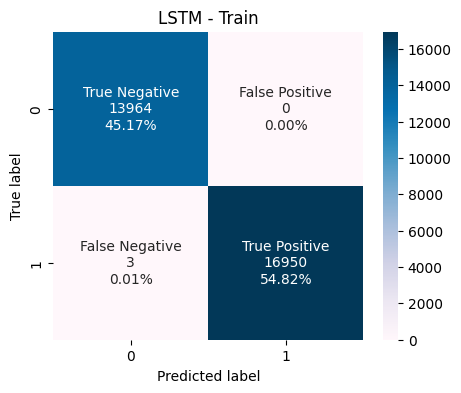

In [55]:
y_pred_probs = lstm_model.predict(X_train_dl)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_train_one_hot, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('LSTM - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


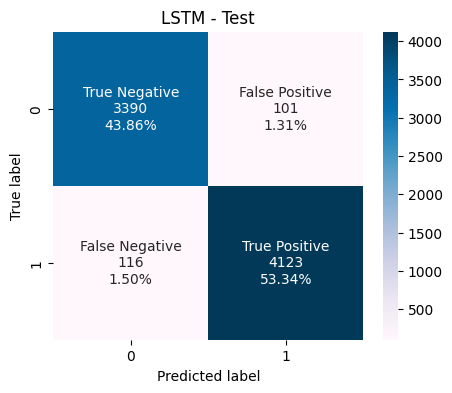

In [56]:
y_pred_probs = lstm_model.predict(X_test_dl)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('LSTM - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 7. Comparison </span>

In [ ]:
# Load all models
with open('../models/dt_pruned_model.pkl', 'rb') as file:
    pruned_tree = pickle.load(file)